# Analysis of univariate random variables

### Task
1. Choose subsample with main variables for your further analysis. Then for each of
them:

2. You need to make a non-parametric estimation of PDF in form of histogram and using
kernel density function (or probability law in case of discrete RV).

3. You need to make an estimation of order statistics and represent them as “box with whiskers” plot.

4. Find one or several theoretical distributions that could describe your sample on a basis of non-parametric analysis results.

5. Estimate parameters of chosen distributions using methods of maximum likelihood and least squares method.

6. Validate your estimated parameters using QQ biplots.

7. Estimate correctness of fitted distributions using at least 2 statistical tests.

In [291]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import brazil.make_dataset
from distfit import distfit

import warnings
warnings.filterwarnings(action='ignore')

In [292]:
cols = pd.read_csv('brazil/columns_description.csv')
# cols.columns
cols[['abbreviation','description']].head(26)

,abbreviation,description
0,date,date (YYYY-MM-DD)
1,hr,hour (HH:00)
2,prcp,Amount of precipitation in millimetres (last h...
3,stp,Atmospheric pressure at station level (mb)
4,smax,Maximum air pressure for the last hour in hPa ...
5,smin,Minimum air pressure for the last hour in hPa ...
6,gbrd,Solar radiation KJ/m2
7,temp,Air temperature (instant) in celsius degrees
8,dewp,Dew point temperature (instant) in celsius deg...
9,tmax,Maximum temperature for the last hour in celsi...


In [293]:
def prepare_df(df):
    abbreviation = ['date','hour','prcp', 'stp', 'smax', 'smin','gbrd','temp','dewp','tmax','tmin','dmax','dmin','hmax','hmin','hmdy','wdct', 'gust', 'wdsp', 'regi','prov','wsnm','inme','lat','lon','elvt']
    
    df.drop(['index'],inplace=True, axis=1)
    df.columns = abbreviation
    df = brazil.make_dataset.clean_na(df)
    df['date_time'] = pd.to_datetime(df['date'] + ' ' +  df['hour'])
    df.drop(['date','hour'], inplace=True, axis=1)

    return df

In [294]:
source_df = pd.read_csv("brazil/south.csv", engine='python')
source_df = prepare_df(source_df)
source_df.dropna(inplace=True)
source_df.head(5)

,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,tmin,dmax,...,gust,wdsp,regi,prov,wsnm,inme,lat,lon,elvt,date_time
10,0.0,1015.7,1015.7,1014.4,61.0,14.4,12.1,14.7,14.2,12.1,...,7.6,1.8,S,RS,PORTO ALEGRE,A801,-30.05,-51.166667,46.97,2000-09-22 10:00:00
11,0.0,1016.3,1016.3,1015.7,508.0,15.3,12.6,15.3,14.4,12.6,...,5.3,2.2,S,RS,PORTO ALEGRE,A801,-30.05,-51.166667,46.97,2000-09-22 11:00:00
12,0.0,1017.0,1017.0,1016.4,1553.0,16.6,12.4,16.8,15.4,13.0,...,6.1,2.2,S,RS,PORTO ALEGRE,A801,-30.05,-51.166667,46.97,2000-09-22 12:00:00
13,0.0,1017.4,1017.4,1016.8,2312.0,17.9,10.6,18.2,16.6,12.2,...,4.6,2.3,S,RS,PORTO ALEGRE,A801,-30.05,-51.166667,46.97,2000-09-22 13:00:00
14,0.0,1016.9,1017.5,1016.9,2828.0,18.6,7.6,18.8,17.8,11.3,...,6.0,1.6,S,RS,PORTO ALEGRE,A801,-30.05,-51.166667,46.97,2000-09-22 14:00:00


Text(0.5, 1.0, 'Weather Data')

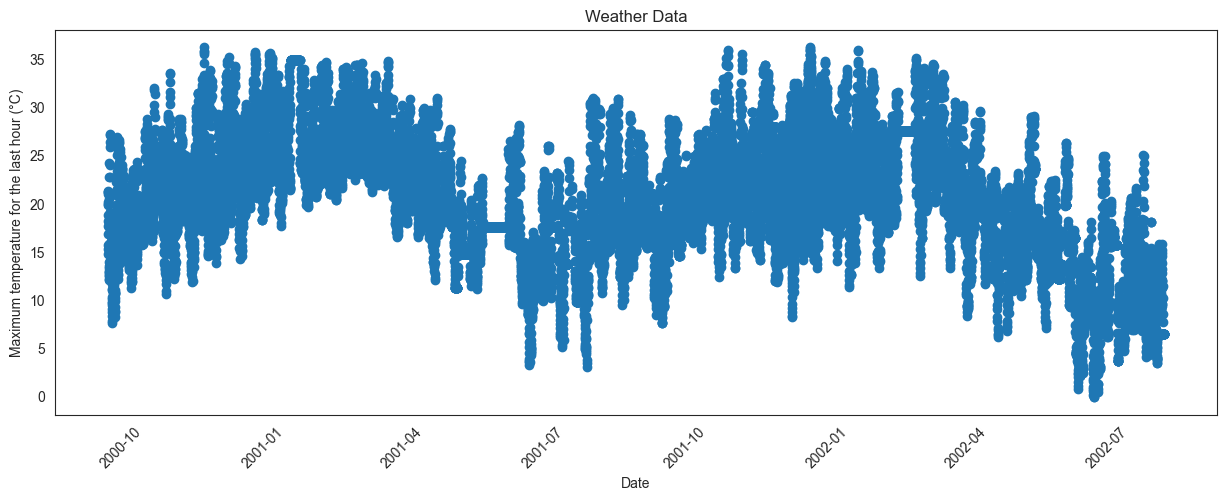

In [295]:
plt.figure(figsize=(15, 5))
plt.scatter(source_df['date_time'],source_df['tmax'])
plt.xticks(rotation=45)
plt.xlabel(u'Date')
plt.ylabel(u'Maximum temperature for the last hour (°C)')
plt.title('Weather Data')

### 2. Non-parametric estimation of PDF
**You need to make a non-parametric estimation of PDF in form of histogram and using kernel density function (or probability law in case of discrete RV).**

A histogram aims to approximate the underlying probability density function that generated the data by binning and counting observations. Kernel density estimation (KDE) presents a different solution to the same problem. Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate:

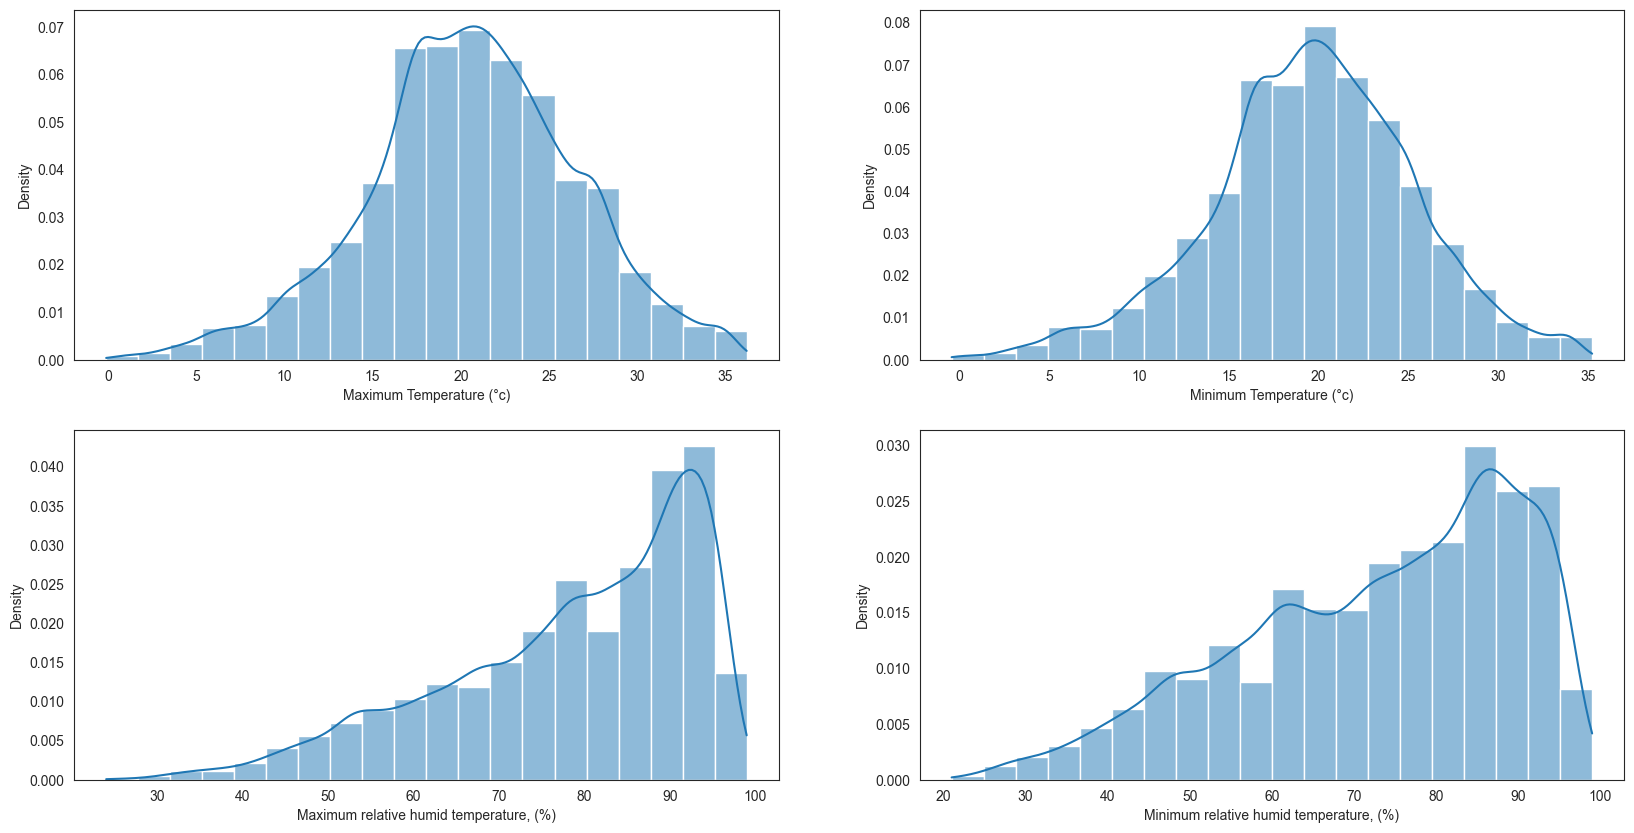

In [296]:
# plot a histogram + KDE
fig, ax = plt.subplots(2, 2, figsize=(20,10))
sns.set_style("white")
tmax = sns.histplot(source_df, x = "tmax", kde = True, bins = 20, ax=ax[0, 0], stat='density')
tmax.set(xlabel='Maximum Temperature (°c)')

tmin = sns.histplot(source_df, x = "tmin", kde = True, bins = 20, ax=ax[0, 1], stat='density')
tmin.set(xlabel='Minimum Temperature (°c)')

hmax = sns.histplot(source_df, x = "hmax", kde = True, bins = 20,ax=ax[1, 0], stat='density')
hmax.set(xlabel='Maximum relative humid temperature, (%)')

hmin = sns.histplot(source_df, x = "hmin", kde = True, bins = 20, ax=ax[1, 1], stat='density')
hmin.set(xlabel='Minimum relative humid temperature, (%)')

plt.show()

### 3. Estimation of order statistics
**You need to make an estimation of order statistics and represent them as box-and-whisker plot.**

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

In [297]:
def box_and_whisker(df, target_col):
    # Get values of price at the given quantiles
    print('ORDER STATISTICS FOR ', target_col)
    print('median:', df[target_col].dropna().median())
    print('mean:', df[target_col].dropna().mean())
    quantiles = df.quantile(q = [.1, .25, .5, .75, .9], axis = 0, numeric_only = True)[target_col]
    print(quantiles)
    # Plot KDE + box-and-whisker
    fig, axs = plt.subplots(nrows=2, sharex=True)
    sns.kdeplot(df, x = target_col, ax=axs[0]).set(xlabel=None, ylabel=None)
    sns.boxplot(x = df[target_col], ax=axs[1])

    quants = quantiles.to_list()
    for i in quants:
        axs[0].axvline(i, color = 'r', linestyle = ':')
        axs[1].axvline(i, color = 'r', linestyle = ':')

ORDER STATISTICS FOR  tmax
median: 20.6
mean: 20.600590295147573
0.10    12.9
0.25    17.1
0.50    20.6
0.75    24.6
0.90    28.1
Name: tmax, dtype: float64
ORDER STATISTICS FOR  tmin
median: 19.7
mean: 19.593946973486744
0.10    12.2
0.25    16.3
0.50    19.7
0.75    23.4
0.90    26.7
Name: tmin, dtype: float64
ORDER STATISTICS FOR  hmax
median: 82.0
mean: 78.44447223611806
0.10    56.0
0.25    69.0
0.50    82.0
0.75    91.0
0.90    94.0
Name: hmax, dtype: float64
ORDER STATISTICS FOR  hmin
median: 76.0
mean: 73.0263631815908
0.10    48.0
0.25    61.0
0.50    76.0
0.75    87.0
0.90    93.0
Name: hmin, dtype: float64


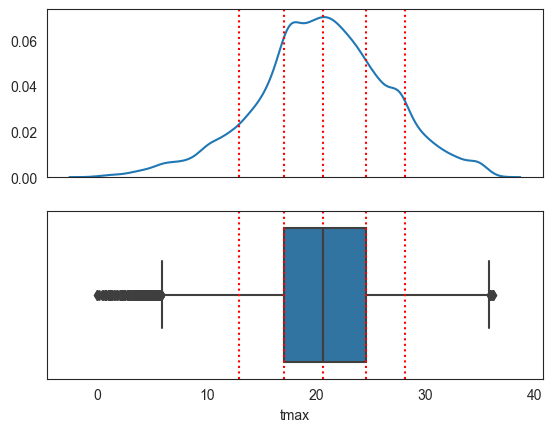

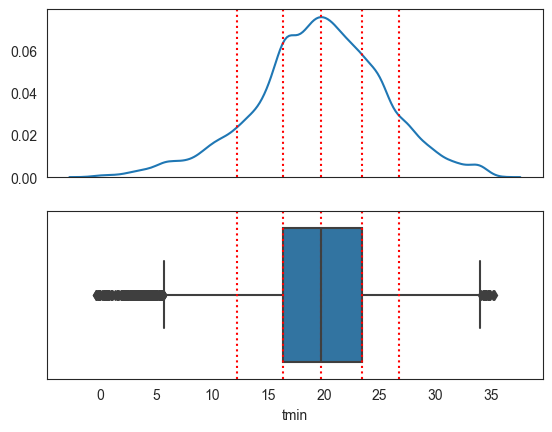

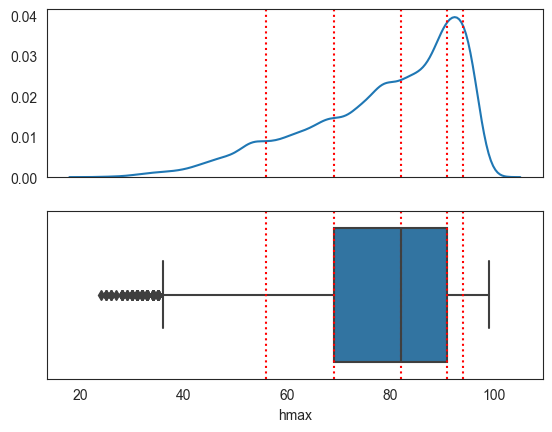

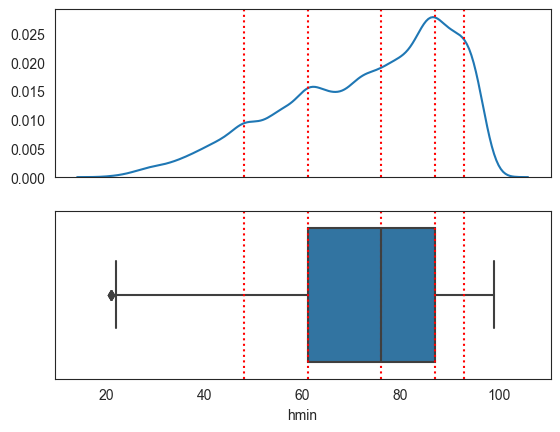

In [298]:
box_and_whisker(source_df, 'tmax')
box_and_whisker(source_df, 'tmin')
box_and_whisker(source_df, 'hmax')
box_and_whisker(source_df, 'hmin')

### 4. Theoretical Distributions Selection
**Find one or several theoretical distributions that could describe your sample on a basis of non-parametric analysis results.**

Let's use the `distfit` python package for probability density fitting of univariate distributions.

It works by comparing the observed frequency (f) to the expected frequency from the model (f-hat), and computing the residual sum of squares (RSS). 

[distfit] >plot summary..


(<Figure size 1000x250 with 1 Axes>,
 <AxesSubplot:title={'center':'Best fit: beta'}, xlabel='Distribution name', ylabel='RSS (lower is better)'>)

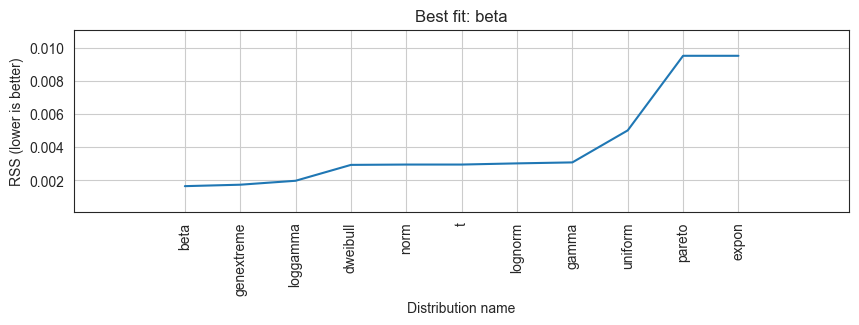

In [318]:
# analysis_df = source_df['tmax'].dropna() 
# analysis_df = source_df['tmin'].dropna() 
# analysis_df = source_df['hmax'].dropna() 
analysis_df = source_df['hmin'].dropna() 
dist = distfit()
dist.fit_transform(analysis_df, verbose=0)
dist.plot_summary(figsize=(10,2.5))

[distfit] >plot..
[distfit] >plot..
[distfit] >plot..
[distfit] >plot..


(None,
 <AxesSubplot:title={'center':'\nbeta\nRSS(a=3.40617, b=1.47735, loc=12.6487, scale=86.3535)'}, xlabel='Values', ylabel='Frequency'>)

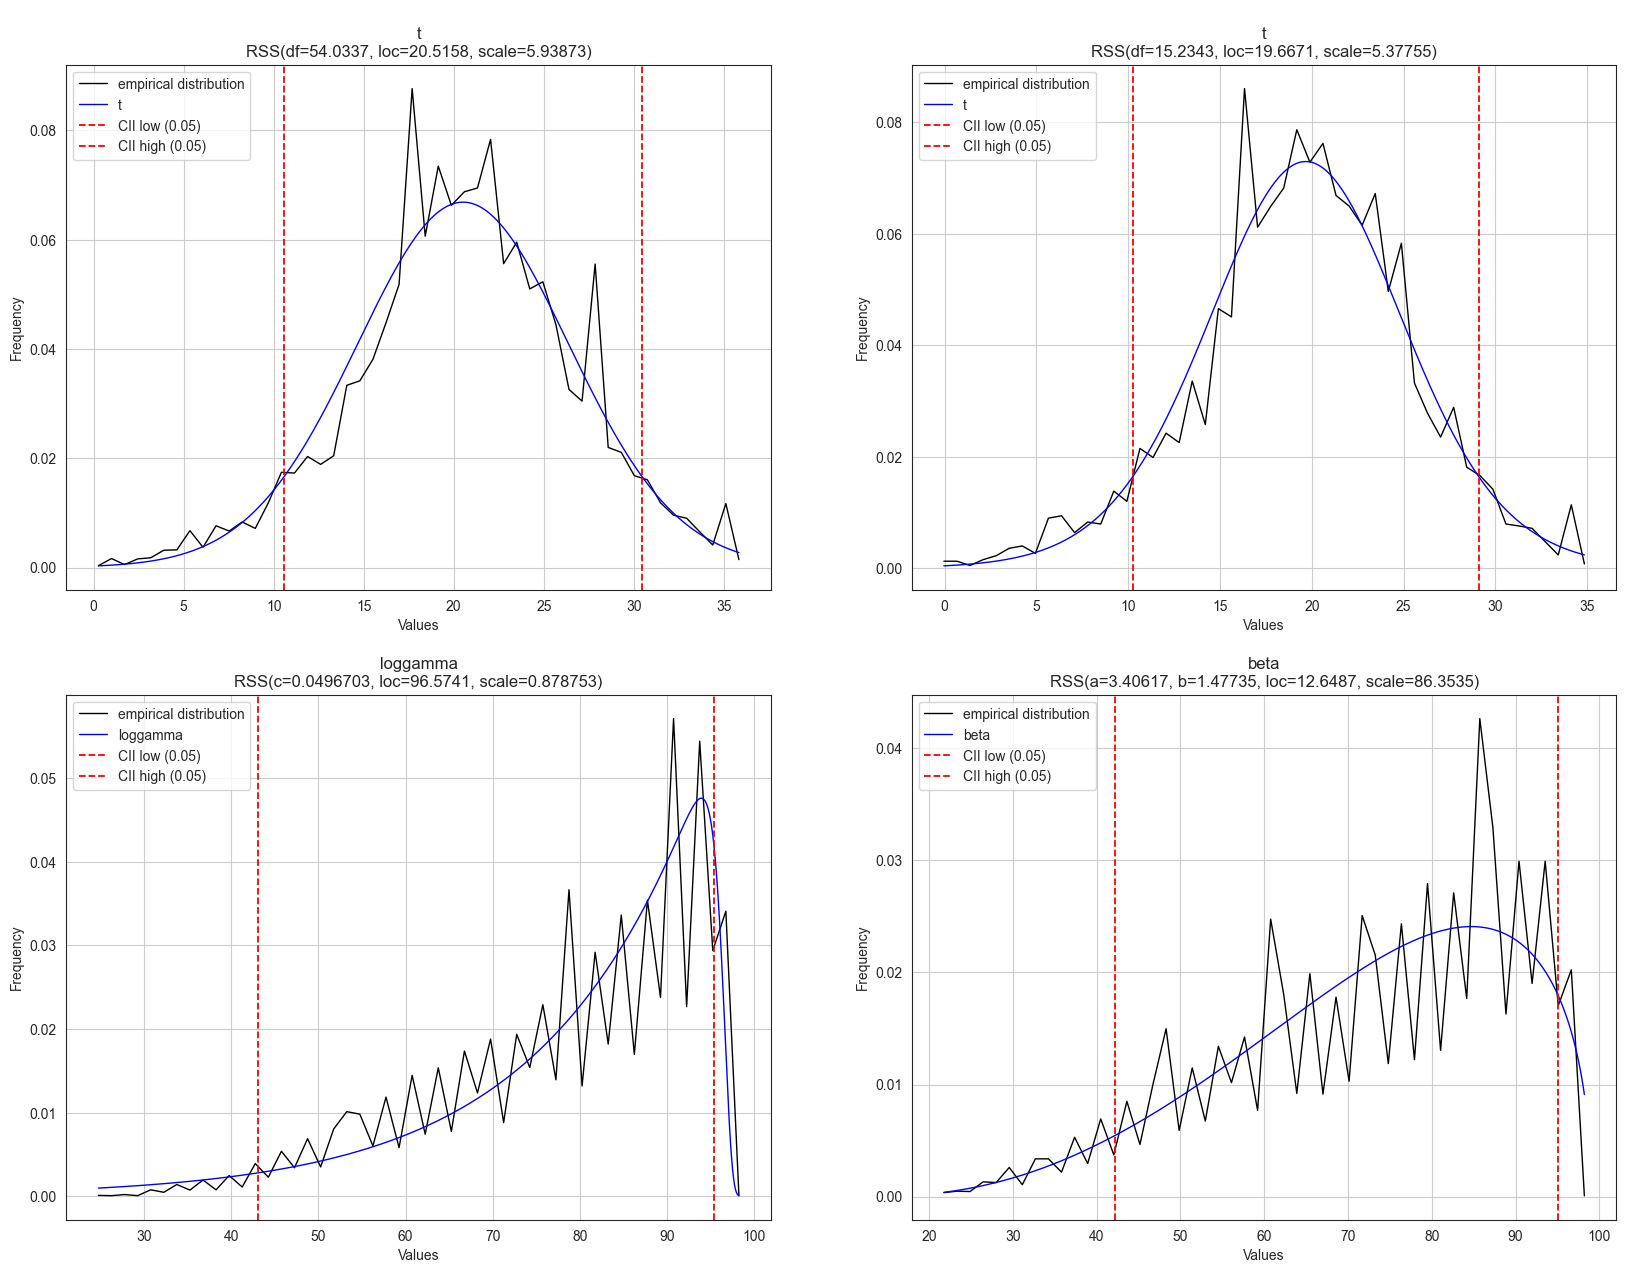

In [300]:
fig, ax = plt.subplots(figsize=(20, 15), ncols=2, nrows=2)

dist = distfit(distr='t')
dist.fit_transform(source_df['tmax'].dropna(), verbose=0)
dist.plot(ax = ax[0, 0])

dist = distfit(distr='t')
dist.fit_transform(source_df['tmin'].dropna(), verbose=0)
dist.plot(ax = ax[0, 1])

dist = distfit(distr='loggamma')
dist.fit_transform(source_df['hmax'].dropna(), verbose=0)
dist.plot(ax = ax[1, 0])

dist = distfit(distr='beta')
dist.fit_transform(source_df['hmin'].dropna(), verbose=0)
dist.plot(ax = ax[1, 1])

### 5. Estimation of parameters of chosen distributions using methods of maximum likelihood and least squares method

In [322]:
def get_params(df, target_col, distr_func, distr_name):
    arr = df[target_col].dropna()
    mle = distr_func.fit(arr)

    print('Distribution', distr_name, 'parameters:', mle)

    def function(x, a, b):
        return distr_func.pdf(x, a, b)

    xdata, ydata = np.histogram(arr, bins=10, density=True)
    ls, _ = scipy.optimize.curve_fit(function, xdata=xdata[:10], ydata=ydata[:10], method='lm', maxfev = 10000000)

    print('Maximum Likelihood Estimation: {:.3f}, {:.3f}'.format(mle[0], mle[1]))
    print('LS Method: {:.3f}, {:.3f}'.format(ls[0], ls[1]))

    return ls[0], ls[1]

print('Maximum temperature:')
tmax_params = get_params(source_df, 'tmax', scipy.stats.t, 't')

print('Minimum temperature:')
tmin_params = get_params(source_df, 'tmin', scipy.stats.t, 't')

print('Maximum humidity:')
hmax_params = get_params(source_df, 'hmax', scipy.stats.loggamma, 'loggamma')

print('Minimum humidity:')
hmin_params = get_params(source_df, 'hmin', scipy.stats.beta, 'beta')

Maximum temperature:
Distribution t parameters: (54.033705581594816, 20.51584686345423, 5.938725337162163)
Maximum Likelihood Estimation: 54.034, 20.516
LS Method: 42.299, 0.032
Minimum temperature:
Distribution t parameters: (15.234303675323705, 19.667102020921824, 5.37754675902486)
Maximum Likelihood Estimation: 15.234, 19.667
LS Method: 41.447, 0.032
Maximum humidity:
Distribution loggamma parameters: (0.04967025438740767, 96.57409107167014, 0.8787532488786569)
Maximum Likelihood Estimation: 0.050, 96.574
LS Method: 11353.906, -9.318
Minimum humidity:
Distribution beta parameters: (3.4061679449638125, 1.4773512389395336, 12.648667230046938, 86.35352590979403)
Maximum Likelihood Estimation: 3.406, 1.477
LS Method: 7.806, 406.726


15.234 19.667
10.708 19.961


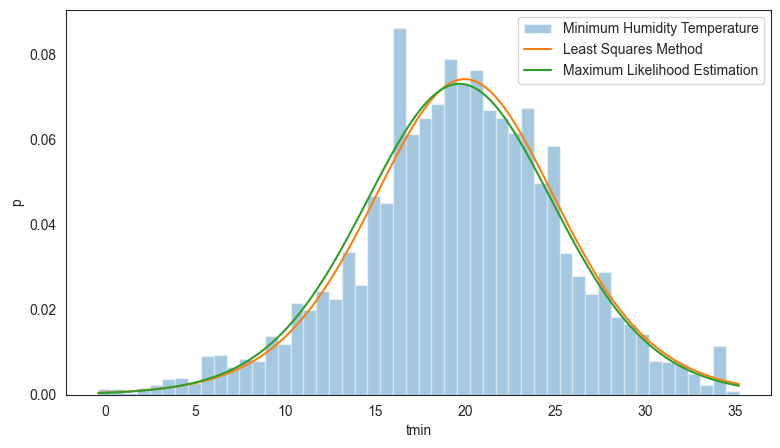

In [302]:
# # Compare the fit of the estimates derived from MLE to those from the LE method:
from scipy.optimize import least_squares

data = source_df['tmin'] # edit source
distr = scipy.stats.t # edit theoretical distribution

def loss_for_least_squares(params):
    global data, distr
    q = np.linspace(0.01, 0.95)
    quantiles_true = np.quantile(data, q)
    quantiles_approx = distr.ppf(q, *params)
    return quantiles_true - quantiles_approx

def getArgsLS(data, distr, bins=25):
    min, max = data.min(), data.max()
    hist, _ = np.histogram(data, bins=bins, density=True)
    xdata = np.linspace(min, max, num=bins)
    par, _ = scipy.optimize.curve_fit(distr.pdf, xdata, hist,
                                    p0=list(distr.fit(data)),
                                    maxfev=1000)
    return par

min, max = data.min(), data.max()
x = np.linspace(min, max, len(data))
# args_ls = least_squares(loss_for_least_squares, (1.0, 1.0, 1.0))['x']
# args_ls = least_squares(loss_for_least_squares, (1.0, 1.0, 0))['x']

args_ls = getArgsLS(data, distr)
args_mle = distr.fit(data)
print(round(args_mle[0], 3), round(args_mle[1], 3))
print(round(args_ls[0], 3), round(args_ls[1], 3))

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)

sns.distplot(data, kde=False, norm_hist=True, label='Minimum Humidity Temperature')
plt.plot(x, distr.pdf(x, *args_ls), label = 'Least Squares Method')
plt.plot(x, distr.pdf(x, *args_mle), label = 'Maximum Likelihood Estimation')
plt.ylabel('p')
plt.legend()
plt.show()

In [303]:
args_ls

array([10.70796596, 19.96132471,  5.26151764])

In [304]:
distr.pdf(x, *args_ls)

array([0.00044202, 0.00044229, 0.00044255, ..., 0.00250863, 0.00250712,
       0.00250562])

### 6. Validation of estimated parameters using QQ plots

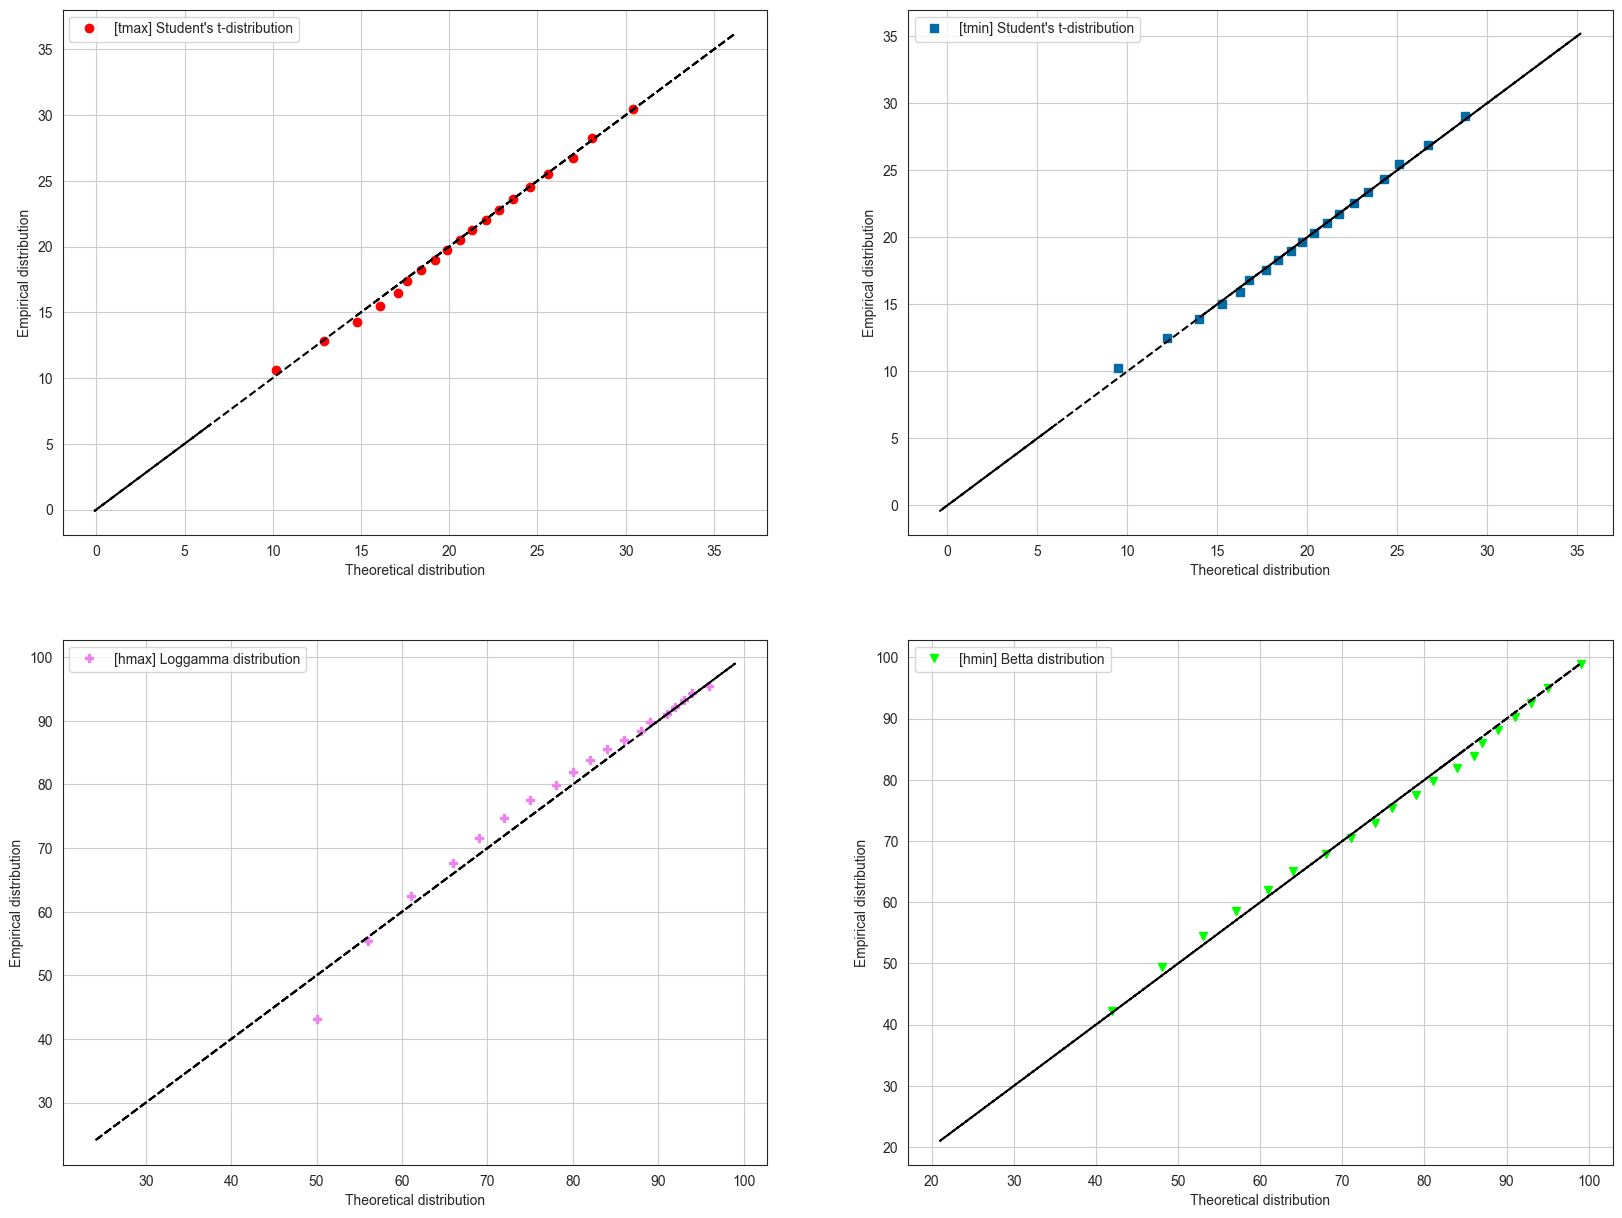

In [333]:
# x = source_df['tmax'].dropna()

# Calculation of quantiles
percs = np.linspace(0, 100, 21)
# qn_first = np.percentile(x, percs)

qn_tmax = scipy.stats.t.ppf(percs / 100.0, *scipy.stats.t.fit(source_df['tmax']))
qn_tmin = scipy.stats.t.ppf(percs / 100.0, *scipy.stats.t.fit(source_df['tmin']))
qn_hmax = scipy.stats.loggamma.ppf(percs / 100.0, *scipy.stats.loggamma.fit(source_df['hmax']))
qn_hmin = scipy.stats.beta.ppf(percs / 100.0, *scipy.stats.beta.fit(source_df['hmin']))
# QQ-plot
# plt.figure(figsize=(5, 5))
fig, ax = plt.subplots(figsize = (20, 15), nrows = 2, ncols = 2)
plt.style.use('tableau-colorblind10')

x = source_df['tmax'].dropna()
ax[0, 0].plot(np.percentile(x, percs)[1:], 
        qn_tmax[1:], ls="", marker="o", color='red', label = '[tmax] Student\'s t-distribution')
ax[0, 0].plot(x, x, color="k", ls="--")
ax[0, 0].set_xlabel('Theoretical distribution')
ax[0, 0].set_ylabel('Empirical distribution')
ax[0, 0].grid(True)
ax[0, 0].legend()

x = source_df['tmin'].dropna()
ax[0, 1].plot(np.percentile(x, percs)[1:], 
        qn_tmin[1:], ls="", marker="s", label = '[tmin] Student\'s t-distribution')
ax[0, 1].plot(x, x, color="k", ls="--")
ax[0, 1].set_xlabel('Theoretical distribution')
ax[0, 1].set_ylabel('Empirical distribution')
ax[0, 1].grid(True)
ax[0, 1].legend()

x = source_df['hmax'].dropna()
ax[1, 0].plot(np.percentile(x, percs)[1:], 
        qn_hmax[1:], ls="", marker="P", color='violet', label = '[hmax] Loggamma distribution')
ax[1, 0].plot(x, x, color="k", ls="--")
ax[1, 0].set_xlabel('Theoretical distribution')
ax[1, 0].set_ylabel('Empirical distribution')
ax[1, 0].grid(True)
ax[1, 0].legend()

x = source_df['hmin'].dropna()
ax[1, 1].plot(np.percentile(x, percs)[1:], 
        qn_hmin[1:], ls="", marker="v", color='lime', label = '[hmin] Betta distribution')
ax[1, 1].plot(x, x, color="k", ls="--")
ax[1, 1].set_xlabel('Theoretical distribution')
ax[1, 1].set_ylabel('Empirical distribution')
ax[1, 1].grid(True)
ax[1, 1].legend()

plt.show()

### 7. Statistical Tests

1. `Kolmogorov-Smirnov Test` или `Критерий согласия Колмогорова` предназначен для проверки гипотезы, подчиняется ли случайная величина некоторому теоретическому закону распределения, если его параметры предполагаются известными (простая гипотеза). Проверку можно проводить для любого вида распределения. Критерий основан на определении максимального отклонения накопленной частости (эмпирической функции распределения) от предполагаемой теоретической функции распределения.

2. `Cramer-Von Mises Test` или `Критерий Крамера — Мизеса — Смирнова` предназначен для проверки простых гипотез о принадлежности анализируемой выборки полностью известному закону.

In [359]:
def test(arr, distr, cdf):
    pdf = distr.fit(arr)
    kstest = scipy.stats.kstest(arr, cdf=cdf, args=pdf, N = 100).pvalue
    cramervonmises = scipy.stats.cramervonmises(arr, cdf=cdf, args=pdf).pvalue
    
    print('Kolmogorov-Smirnov Test: {:.10f}'.format(kstest))
    print('Cramer–Von Mises Test: {:.10f}'.format(cramervonmises))

In [307]:
def cut_tails(array):
    array_cut = []
    q75, q25 = np.percentile(array, [75, 25])
    interval = q75 - q25
    
    min_dist = q25 - (1.5 * interval)
    max_dist = q75 + (1.5 * interval)
    
    for data in array:
        if data < max_dist and data > min_dist:
            array_cut.append(data)
    return array_cut

In [308]:
len(cut_tails(source_df.tmax.dropna()))

19694

In [360]:
test(cut_tails(source_df['tmax'].dropna()), distr = scipy.stats.t, cdf = 't')
test(cut_tails(source_df['tmin'].dropna()), distr = scipy.stats.t, cdf = 't')

Kolmogorov-Smirnov Test: 0.0000000024
Cramer–Von Mises Test: 0.0014286664
Kolmogorov-Smirnov Test: 0.0000000005
Cramer–Von Mises Test: 0.0039936546


As the sample dataset has a significant size, we suppose that statistical tests will output `p`-value that is likely be zero. To avoid these results, it should be considered that the initial dataset's size should be reduced.

In [371]:
sample_df = source_df.dropna().sample(n = 2000, random_state = 42) # shuffle dataframe and select 10k elements
sample_df

,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,tmin,dmax,...,gust,wdsp,regi,prov,wsnm,inme,lat,lon,elvt,date_time
8725,0.2,1013.7,1013.7,1012.8,419.0,17.0,15.1,17.2,16.7,15.7,...,14.3,4.3,S,RS,PORTO ALEGRE,A801,-30.0500,-51.166667,46.97,2001-04-24 13:00:00
6473,0.0,1004.6,1005.4,1004.6,2526.0,34.6,22.5,34.9,33.9,23.1,...,5.9,2.3,S,RS,PORTO ALEGRE,A801,-30.0500,-51.166667,46.97,2001-01-20 17:00:00
1825,0.0,1007.2,1007.2,1006.9,2.0,20.6,15.2,21.8,20.6,15.3,...,1.3,0.3,S,RS,PORTO ALEGRE,A801,-30.0500,-51.166667,46.97,2000-12-07 01:00:00
9129,0.0,1007.7,1007.8,1007.7,58.0,14.6,12.8,14.8,14.6,12.9,...,4.9,2.3,S,RS,PORTO ALEGRE,A801,-30.0500,-51.166667,46.97,2001-05-11 09:00:00
12608,0.0,1002.1,1002.1,1001.5,2.0,16.4,13.8,16.4,15.9,14.3,...,9.6,3.9,S,RS,PORTO ALEGRE,A801,-30.0500,-51.166667,46.97,2001-10-03 08:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12614,0.0,1004.4,1004.9,1004.4,1751.0,20.8,14.7,21.2,19.0,15.6,...,11.1,3.7,S,RS,PORTO ALEGRE,A801,-30.0500,-51.166667,46.97,2001-10-03 14:00:00
2750,0.4,972.7,972.8,972.7,875.0,19.3,18.2,19.3,18.5,18.3,...,4.5,2.4,S,RS,SANTANA DO LIVRAMENTO,A804,-30.8425,-55.612778,196.00,2001-12-05 14:00:00
1722,0.0,1002.9,1003.4,1002.3,2289.0,28.1,15.5,29.3,26.8,17.9,...,6.4,2.6,S,RS,PORTO ALEGRE,A801,-30.0500,-51.166667,46.97,2000-12-02 18:00:00
9715,0.0,1010.3,1010.3,1009.8,24.0,17.1,15.0,17.5,16.5,15.2,...,3.6,0.9,S,RS,PORTO ALEGRE,A801,-30.0500,-51.166667,46.97,2001-06-04 19:00:00


In [372]:
test(cut_tails(sample_df['hmax'].dropna()), distr = scipy.stats.loggamma, cdf = 'loggamma')
test(cut_tails(sample_df['hmin'].dropna()), distr = scipy.stats.beta, cdf = 'beta')

Kolmogorov-Smirnov Test: 0.0000000219
Cramer–Von Mises Test: 0.0000055338
Kolmogorov-Smirnov Test: 0.0079527277
Cramer–Von Mises Test: 0.1389367028


As Kolgmogorov-Smirnov test returns extra small p-value, we can try to reduce the size of sample dataframe and try to perform the tests again:

In [313]:
# tmax

arr = cut_tails(source_df.tmax.dropna())
arr = arr[0:int(len(arr)/10)]
print('Subsample size is', len(arr))
test(arr, distr = scipy.stats.t, cdf = 't')

Subsample size is 1969
Kolmogorov-Smirnov Test: 0.0025220697
Cramer–Von Mises Test: 0.0034175129


In [314]:
# tmin

arr = cut_tails(source_df.tmin.dropna())
arr = arr[0:int(len(arr)/10)]
print('Subsample size is', len(arr))
test(arr, distr = scipy.stats.t, cdf = 't')

Subsample size is 1963
Kolmogorov-Smirnov Test: 0.0096158865
Cramer–Von Mises Test: 0.0158583740


In [315]:
# hmax

arr = cut_tails(source_df.hmax)
print('Subsample size is', len(arr))
test(arr[0:int(len(arr)/50)], distr = scipy.stats.loggamma, cdf = 'loggamma')

Subsample size is 19838
Kolmogorov-Smirnov Test: 0.0000000000
Cramer–Von Mises Test: 0.0000000252


In [316]:
# hmin

arr = cut_tails(source_df.hmin.dropna())
arr = arr[0:int(len(arr)/30)]
print('Subsample size is', len(arr))
test(arr, distr = scipy.stats.beta, cdf = 'beta')

Subsample size is 665
Kolmogorov-Smirnov Test: 0.0002348413
Cramer–Von Mises Test: 0.0032949776
